# Test encoder

Test encoder on a simple artificial example.
This should ensure that the encoder is working correctly and help to debug any issues.

Encoder will be trained to reverse a sequence of random integers encoded as one-hot vectors.

In [3]:
%load_ext autoreload
%autoreload 2
from mint.model import Encoder
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mint.config import config, to_dict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
def generate_dataset(n_samples, seq_len, n_classes):
    x = torch.randint(0, n_classes, (n_samples, seq_len))
    y = torch.flip(x, dims=[1])
    y = F.one_hot(y, num_classes=n_classes).float()
    return x, y

def loss(source, target):
    return F.mse_loss(source, target)

def train(encoder, x, y, n_epochs, lr):
    optimizer = torch.optim.Adam(encoder.parameters(), lr=lr)
    losses = []
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = encoder(x)
        l = loss(output, y)
        l.backward()
        optimizer.step()
        losses.append(l.item())
        print(f"Epoch {epoch}, loss: {l.item()}")
        
    return losses

In [18]:
VOCAB_SIZE = 10
SEQ_LEN = 10

config.model.d_model = 10
config.model.n_heads = 1
config.model.max_seq_len = SEQ_LEN
config.model.d_feedforward = 16
config.encoder.n_blocks = 1
config.encoder.embedding.vocab_size = VOCAB_SIZE

encoder = Encoder(**to_dict(config)["encoder"])

torch.Size([1000, 10]) torch.Size([1000, 10, 10])
Epoch 0, loss: 0.000999123090878129
Epoch 1, loss: 0.003959126770496368
Epoch 2, loss: 0.0014321075286716223
Epoch 3, loss: 0.0027437512762844563
Epoch 4, loss: 0.002199776004999876
Epoch 5, loss: 0.0014995238743722439
Epoch 6, loss: 0.0014182610902935266
Epoch 7, loss: 0.0017210100777447224
Epoch 8, loss: 0.001767942332662642
Epoch 9, loss: 0.0014993710210546851
Epoch 10, loss: 0.0012446074979379773
Epoch 11, loss: 0.0012110760435461998
Epoch 12, loss: 0.0013363512698560953
Epoch 13, loss: 0.0014024111442267895
Epoch 14, loss: 0.0013032463612034917
Epoch 15, loss: 0.0011472174664959311
Epoch 16, loss: 0.001078837551176548
Epoch 17, loss: 0.001119688036851585
Epoch 18, loss: 0.0011801489163190126
Epoch 19, loss: 0.0011791738215833902
Epoch 20, loss: 0.001118269981816411
Epoch 21, loss: 0.0010543693788349628
Epoch 22, loss: 0.0010315808467566967
Epoch 23, loss: 0.001049579819664359
Epoch 24, loss: 0.0010706952307373285
Epoch 25, loss: 0.

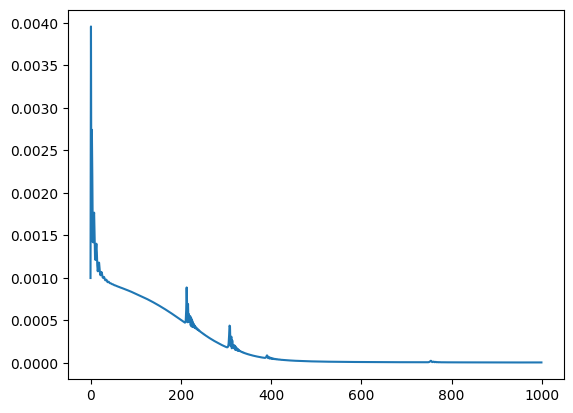

Input: tensor([[4, 0, 8, 4, 4, 1, 1, 8, 3, 2]])
Output: tensor([[2, 3, 8, 1, 1, 4, 4, 8, 0, 4]])


In [20]:
source, target = generate_dataset(1000, SEQ_LEN, VOCAB_SIZE)
print(source.shape, target.shape)

losses = train(encoder, source, target, 1000, 0.01)  

plt.plot(losses)
plt.show()

x, y = generate_dataset(1, SEQ_LEN, VOCAB_SIZE)
print("Input:", x)
print("Output:", torch.argmax(encoder(x), dim=-1))

